In [1]:
#A notebook by LN
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Conv2D,BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imdg
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

C:\Users\user\Documents\IASC


In [3]:
path=os.path.join(os.getcwd(),'agedetectiontrain')
path

'C:\\Users\\user\\Documents\\IASC\\agedetectiontrain'

In [8]:
labels=pd.read_csv(path+'\\train.csv')
labels.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [9]:
labels.describe()

,ID,Class
count,19906,19906
unique,19906,3
top,377.jpg,MIDDLE
freq,1,10804


Text(0.5, 1.0, 'OLD')

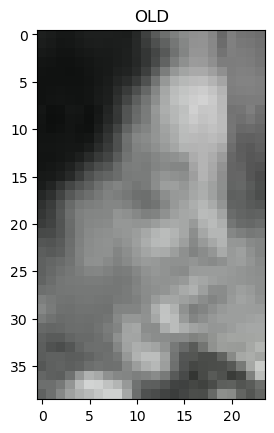

In [10]:
img=Image.open(os.path.join(path,'Train',labels.ID[100]))
label=labels.Class[100]
plt.imshow(img)
plt.title(label)

In [45]:
path=os.getcwd()
path

'C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\trainimgs'

# Create directories of Training Images
Create Directories of Training images and sort images based on their ground truth into three sub directories: young, middle and old.

Directory structure

    agedetectiontrain
        |-trainimgs
             |-young
             |-middle
             |-old


In [54]:
for i in labels.index:
    label=labels.Class[i]
    if label=='YOUNG':
        path='C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\trainimgs\\young'
        os.chdir(path)
        img=Image.open('C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\Train\\'+labels.ID[i])
        img.save(labels.ID[i],"JPEG")
        os.chdir('..')
        
    elif label=="MIDDLE":
        path='C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\trainimgs\\middle'
        os.chdir(path)
        img=Image.open('C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\Train\\'+labels.ID[i])
        img.save(labels.ID[i],"JPEG")
        os.chdir('..')
        
    else:
        path='C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\trainimgs\\old'
        os.chdir(path)
        img=Image.open('C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\Train\\'+labels.ID[i])
        img.save(labels.ID[i],"JPEG")
        os.chdir('..')

In [30]:
imdgen=imdg(
    rescale=1./255,
    validation_split=0.05,
)

In [32]:
os.chdir(path+'\\trainimgs')
path=os.getcwd()
path

'C:\\Users\\user\\Documents\\IASC\\agedetectiontrain\\trainimgs'

In [33]:
data_train=imdgen.flow_from_directory(path,target_size=(32, 32),subset='training')
data_val=imdgen.flow_from_directory(path,target_size=(32, 32),subset='validation')

Found 18912 images belonging to 3 classes.
Found 994 images belonging to 3 classes.


In [82]:
imdgen_test=imdg(
    rescale=1./255,
)
data_test=imdgen_test.flow_from_directory('C:\\Users\\user\\Documents\\IASC\\agedetectiontest',
                                          target_size=(32, 32)
                                         )

Found 6636 images belonging to 1 classes.


32


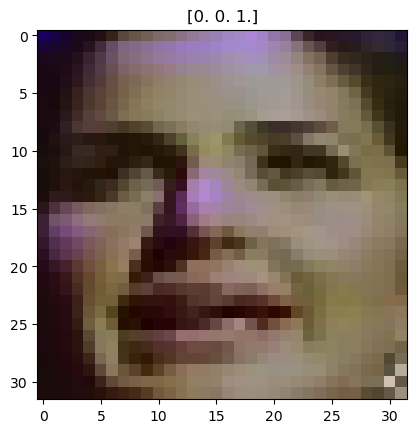

In [160]:
i=0
while i<1:
    i+=1
    batch=next(data_train)
    print(len(batch[0][5]))
    img,label=batch[0][5],batch[1][5]
    plt.imshow(img)
    plt.title(label)

In [161]:
base=tf.keras.applications.vgg16.VGG16(
    input_shape=(32,32,3),
    include_top=False,
    weights="imagenet",
)
base.trainable=False

In [162]:
inputs = Input(shape=(32,32,3))
x = base(inputs, training=False)
x=BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x= Dropout(0.3)(x)
predictions = Dense(3)(x)

model=keras.Model(inputs,predictions)

In [166]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
print(model.summary())

In [3]:
model=keras.models.load_model('age_recog.h5')

In [4]:
os.chdir('C:\\Users\\user\\Documents\\IASC')
path=os.getcwd()
path

'C:\\Users\\user\\Documents\\IASC'

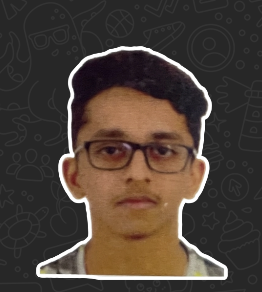

In [5]:
path='Screenshot 2023-07-30 145905.png'
img=Image.open(path)
img

In [6]:
img=img.resize((32,32))

In [7]:
img_ar=np.array(img)
img_ar.resize((1,32,32,3))

In [8]:
prdn=model.predict(img_ar)
prdn=np.argmax(prdn)

1/1 [==============================] - 0s 274ms/step


In [6]:
labels={0:'middle',1:'old',2:'young'}
labels

{0: 'middle', 1: 'old', 2: 'young'}

In [7]:
labels[prdn]

'young'

In [8]:
old_img=Image.open("Screenshot 2023-07-30 150956.png")

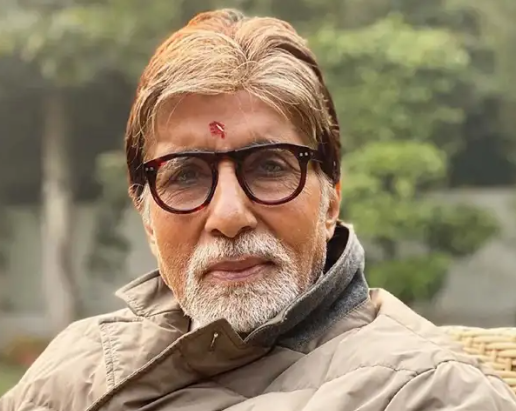

In [9]:
old_img

In [10]:
old_img=old_img.resize((32,32))
img_arr=np.array(old_img)
img_arr.resize((1,32,32,3))

In [11]:
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)

1/1 [==============================] - 0s 24ms/step


In [12]:
labels[prdn]

'old'

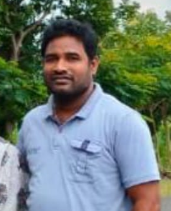

In [28]:
middle_age=Image.open("Screenshot 2023-07-30 152249.png")
middle_age

In [29]:
middle_age=middle_age.resize((32,32))
img_arr=np.array(middle_age)
img_arr.resize((1,32,32,3))

In [15]:
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)
print(f'Analyzed the image and predicted that the person in the image kinda looks \033[1m {labels[prdn].upper()}\033[0m')

1/1 [==============================] - 0s 24ms/step
Analyzed the image and predicted that the person in the image kinda looks  MIDDLE


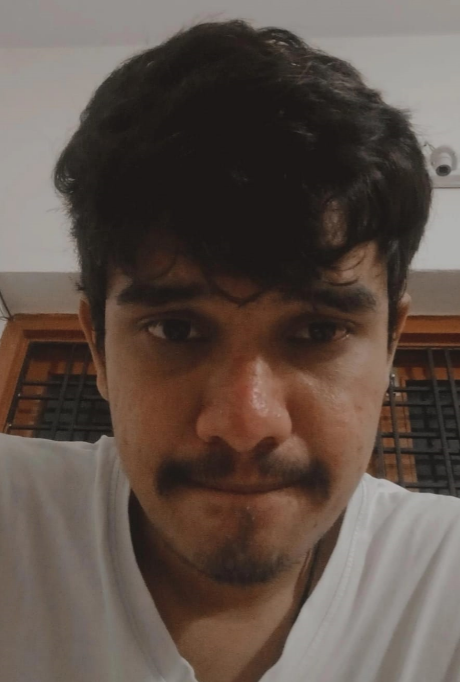

In [16]:
chaitu=Image.open("Screenshot 2023-07-30 173357.png")
chaitu

In [17]:
chaitu=chaitu.resize((32,32))
img_arr=np.array(chaitu)
img_arr.resize((1,32,32,3))
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)
print(f'Analyzed the image and predicted that the person in the image kinda looks \033[1m {labels[prdn].upper()}\033[0m')

1/1 [==============================] - 0s 24ms/step
Analyzed the image and predicted that the person in the image kinda looks  YOUNG


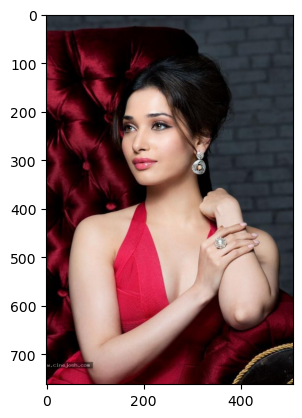

In [26]:
thamanna=Image.open("Screenshot 2023-07-30 174157.png")
plt.imshow(thamanna)

In [27]:
thamanna=thamanna.resize((32,32))
img_arr=np.array(thamanna)
img_arr.resize((1,32,32,3))
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)
print(f'Analyzed the image and predicted that the person in the image kinda looks\033[1m {labels[prdn].upper()}\033[0m')

1/1 [==============================] - 0s 27ms/step
Analyzed the image and predicted that the person in the image kinda looks MIDDLE


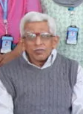

In [20]:
someone=Image.open("Screenshot 2023-07-30 212916.png")
someone

In [21]:
someone=someone.resize((32,32))
img_arr=np.array(someone)
img_arr.resize((1,32,32,3))
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)
print(f'Analyzed the image and predicted that the person in the image kinda looks\033[1m {labels[prdn].upper()}\033[0m')

1/1 [==============================] - 0s 25ms/step
Analyzed the image and predicted that the person in the image kinda looks OLD


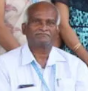

In [22]:
sivaReddy=Image.open('Screenshot 2023-07-30 213132.png')
sivaReddy

In [44]:
sivaReddy=sivaReddy.resize((32,32))
img_arr=np.array(sivaReddy)
img_arr.resize((1,32,32,3))
prdn=model.predict(img_arr)
prdn=np.argmax(prdn)
print(f'Analyzed the image and predicted that the person in the image kinda looks \033[1m {labels[prdn].upper()}\033[0m')

1/1 [==============================] - 0s 25ms/step
Analyzed the image and predicted that the person in the image kinda looks  MIDDLE


In [56]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_3 (Batc  (None, 1, 1, 512)        2048      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539